# Softmax regression Implementation from scratch without using scikit Learn

In [47]:
import numpy as np
import plotly as py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

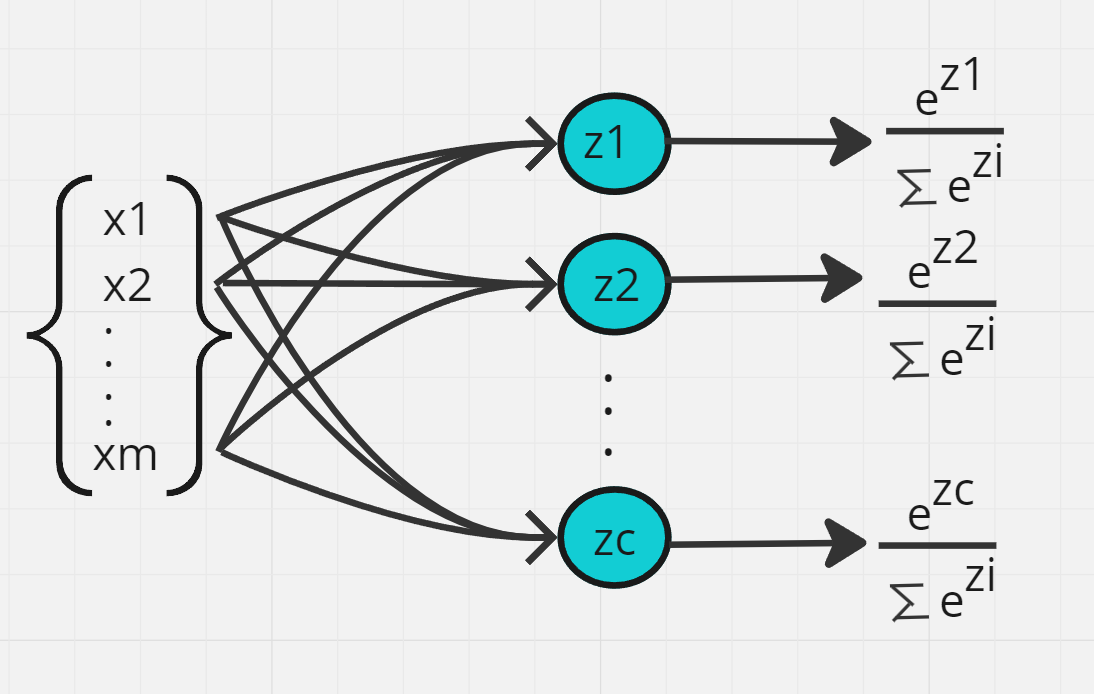
The softmax regression predicts probability of any instance to belong to one of the class using softmax function. Here z1,z2,..,zc denote linear combination of input features. (c is number of classes here). Here gradient descent would be used to find the weights( which are used to calculate zi's and ultimately the probabilities).

## Reading from dataset

In [48]:
df=pd.read_csv('/kaggle/input/digitrecogniser/train.csv/train.csv')
df.head()
df2=pd.read_csv('/kaggle/input/digitrecogniser/test.csv/test.csv')

In [49]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [50]:
X_train = df.drop('label', axis=1).values
y_train = df['label'].values
X_test = df2.values
# No y_test is present in the dataset
print("The shape of training data is (it is a dataframe):",X_train.shape)
num_of_features=X_train.shape[1]
num_of_classes=10

The shape of training data is (it is a dataframe): (42000, 784)


## Softmax regression Model and Gradient descent

In [51]:
class SoftmaxRegression:
    #Learning rate is preset to 0.01 and number of epochs is set to 1000
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.01, num_epochs=1000):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = np.zeros((num_of_features, num_of_classes))#initially all weights and biases are set to 0
        self.b = np.zeros(num_of_classes)
        self.loss_history = []

    def softmax(self, z):#softmax function, z is matrix, where each row corresponds to a sample and each column is a class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))#subtracted the maximum value in each row to help prevent overflow and maintain numerical stability in exponentiation
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):#y is labels of input ,vector
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1#for each row, column corresponding to that sample is set to one and others to 0
        return one_hot_y

    #forward and backward propogation
    def fit(self, X, y):
        y_one_hot = self.one_hot_encode(y)
        #training loop
        for epoch in range(self.num_epochs):
            #forward propogation, 
            z = np.dot(X, self.W) + self.b#result z is also a matrix
            y_pred = self.softmax(z)#result is a matrix
            loss = self.cross_entropy_loss(y_one_hot, y_pred)#loss function used is cross entropy loss
            self.loss_history.append(loss)
            dz = y_pred - y_one_hot#update
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0)
            #backward propogation
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        self.plot_loss()
        
    #loss over epochs
    def plot_loss(self):
        plt.plot(range(1, self.num_epochs + 1), self.loss_history, label='Training Loss')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid zeros
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))#cross entropy function is used here


    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        return np.argmax(y_pred, axis=1)#choose that class with largest probability for each class
    
    def evaluate(self, X, y,print_confusion_matrix=False):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        
        # Calculate precision, recall, and F1-score
        tp = np.sum((y_pred == y) & (y_pred == 1))#true positives
        fp = np.sum((y_pred != y) & (y_pred == 1))#false positives
        fn = np.sum((y_pred != y) & (y_pred == 0))#false negatives
        if (tp + fp != 0):
            precision = tp / (tp + fp)  
        else:
            precision = 0
        if (tp + fn != 0):
            recall = tp / (tp + fn) 
        else :
            recall=0
        if (precision+recall !=0):
            f1_score = 2 * precision * recall / (precision + recall)
        else :
            f1_score=0
        print(f"Precision:{precision:.4f}")
        print(f"Recall:{precision:.4f}")
        print(f"Accuracy:{precision:.4f}")
        print(f"F1_Score:{f1_score:.4f}")
        if print_confusion_matrix:
            confusion = confusion_matrix(y, y_pred)
            self.plot_confusion_matrix(confusion)
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

## fitting the model

Epoch 100/1000, Loss: 3.7499
Epoch 200/1000, Loss: 4.3777
Epoch 300/1000, Loss: 4.6123
Epoch 400/1000, Loss: 1.9769
Epoch 500/1000, Loss: 1.7801
Epoch 600/1000, Loss: 3.5246
Epoch 700/1000, Loss: 1.8168
Epoch 800/1000, Loss: 7.6221
Epoch 900/1000, Loss: 1.6798
Epoch 1000/1000, Loss: 1.7670


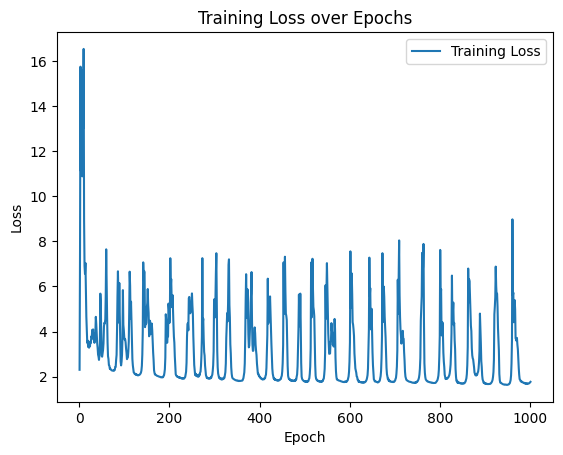

In [52]:
softmax_model = SoftmaxRegression(num_of_features, num_of_classes)
softmax_model.fit(X_train, y_train)

In [53]:
y_test_pred = softmax_model.predict(X_test)
y_test_pred

array([2, 0, 9, ..., 3, 9, 2])

## Evaluating the model

Precision:0.9645
Recall:0.9645
Accuracy:0.9645
F1_Score:0.9668


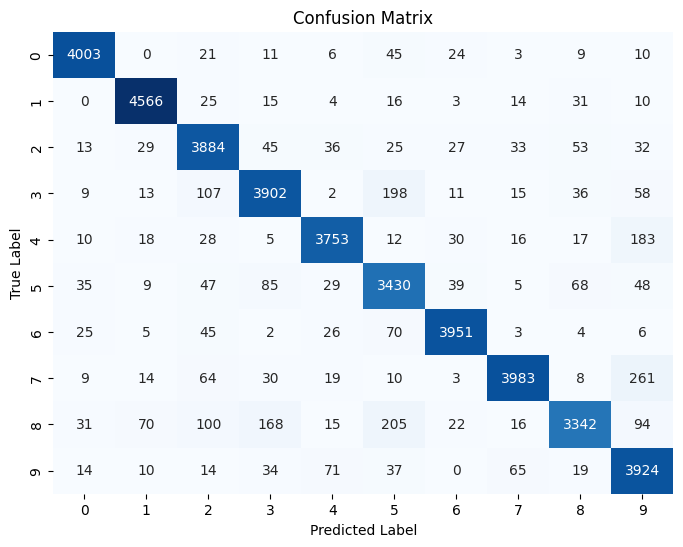

In [54]:
softmax_model.evaluate(X_train,y_train,True)